# Introduction

In Part I, we collected our data using the API, and cleaned the data in Part II. In Part III, we will perform visualization. 

We visualize the data so that we can detect any possible outliers, anomalies, and build intuition around the data before we perform machine learning modelling in Part IV.  

In this notebook, you will do the following:
1. Import pandas and data vizualization libraries
2. Visualize the taxi availability over the month
3. Visualize the taxi availability over the 24 hours in a day
4. Visualize the taxi availability by day of the week

<strong>Useful reading on visualization</strong>: 
1. <a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)
2. <a href = "https://machinelearningmastery.com/time-series-data-visualization-with-python/">Time Series Data Visualization with Python</a>

It's quite comprehensive and a useful guide for this Part if you're new to visualization.

### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn as sns

In [6]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
from matploblib import pyplot
import seaborn as sns

ModuleNotFoundError: No module named 'matploblib'

### Step 2: Read the CSV from Part II
We will now read the CSV from Part II using pandas.

Things to take note of: 
1. make sure 'time' is your index
2. parse the datetime in 'time' so that it's a proper DateTime object

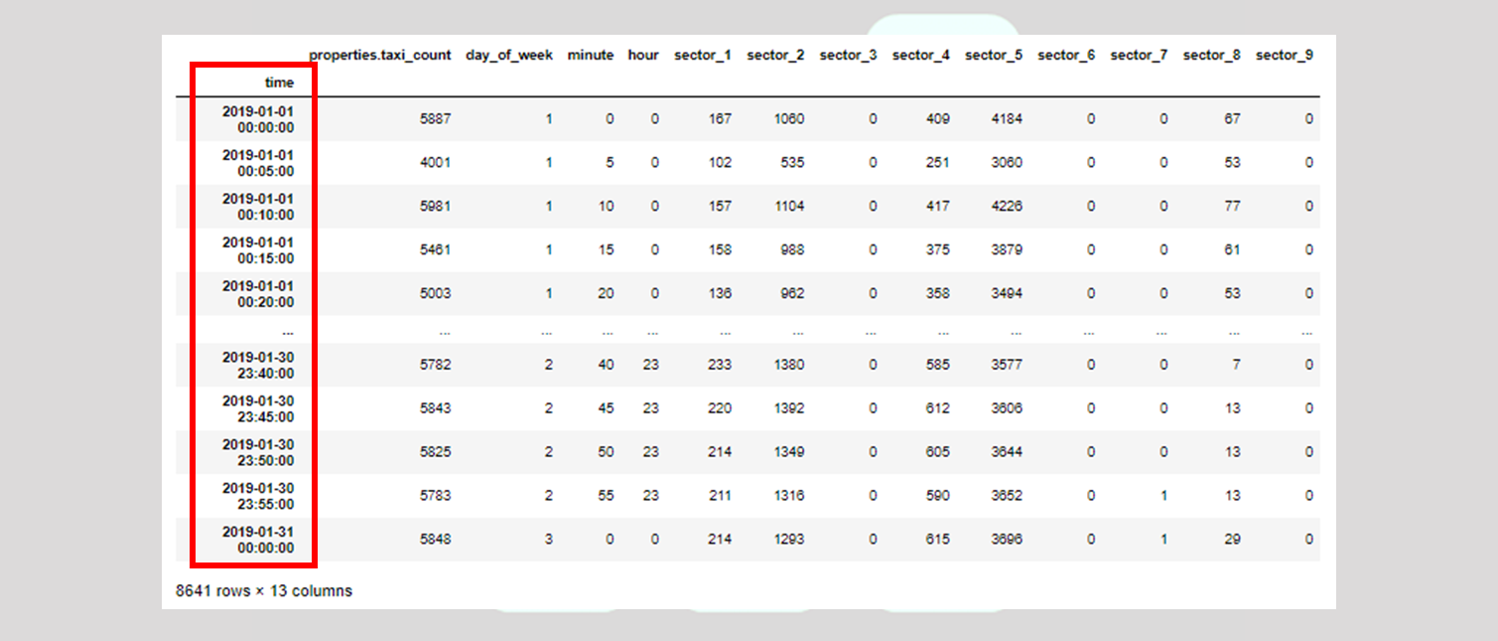

This parsing is important because having a DateTime object as your index will make plotting much easier.

<strong>Hint: look through pandas documentation to <em>parse dates</em> and turn them into DateTime objects</strong>

In [3]:
# Step 2: Read your CSV as DateTime and make sure the dates are parsed
df = pd.read_csv('taxi_availability_cleaned.csv', parse_dates=True)
df

,time,properties.taxi_count,day_of_week,minute,hour,sector_count0,sector_count1,sector_count2,sector_count3,sector_count4,sector_count5,sector_count6,sector_count7,sector_count8
0,2019-01-01 00:00:00,5887,1,0,0,167,979,81,409,3506,678,0,67,0
1,2019-01-01 00:05:00,4001,1,5,0,102,496,39,251,2589,471,0,53,0
2,2019-01-01 00:10:00,5981,1,10,0,157,1035,69,417,3546,680,0,77,0
3,2019-01-01 00:15:00,5461,1,15,0,158,920,68,375,3225,654,0,61,0
4,2019-01-01 00:20:00,5003,1,20,0,136,900,62,358,2898,596,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2019-01-30 23:40:00,5782,2,40,23,233,1301,79,585,2591,986,0,7,0
8637,2019-01-30 23:45:00,5843,2,45,23,220,1314,78,612,2645,961,0,13,0
8638,2019-01-30 23:50:00,5825,2,50,23,214,1269,80,605,2684,960,0,13,0
8639,2019-01-30 23:55:00,5783,2,55,23,211,1228,88,590,2702,950,1,13,0


### Step 3: Plot 'properties.taxi_count'
Onwards to our first plot - let's give 'properties.taxi_count' a try! When it comes to plotting, you have a few choices:
1. seaborn
2. matplotlib.pyplot
3. DataFrame plotting method

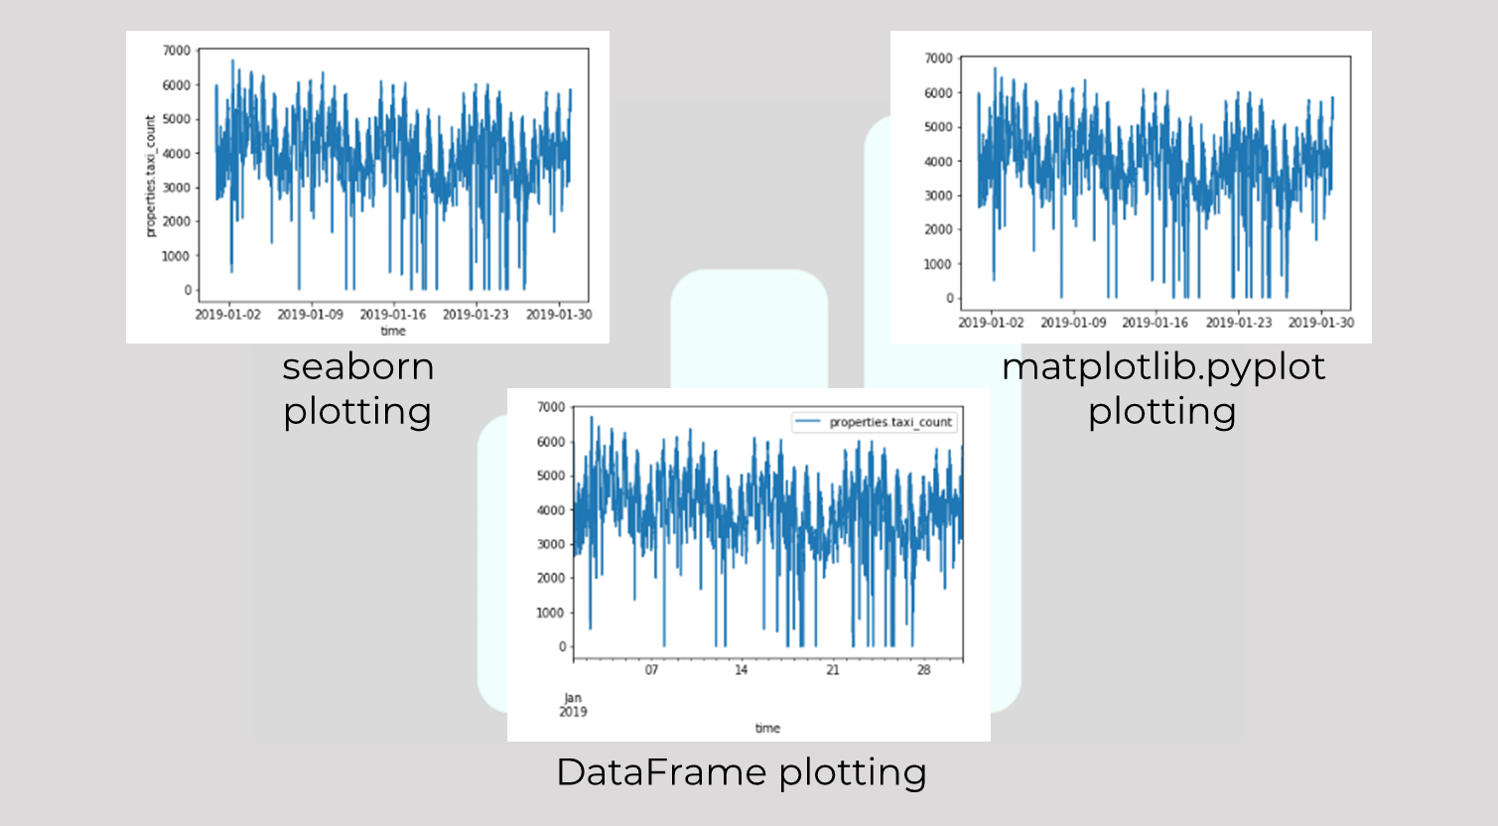

They are all equally valid, so pick your poison and plot! If your index is a DateTimeIndex object, you will have an easier time plotting. 

<AxesSubplot:xlabel='time'>

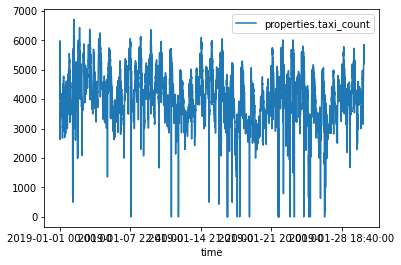

In [17]:
# Step 3: Plot properties.taxi_count vs time
taxi_count = df[['time', 'properties.taxi_count']]
taxi_count.index = df['time']
taxi_count.plot()

### Step 4: Investigate the odd datapoints
Wait a minute, what's going on here? If you've noticed, the visualzation suggests that there are 0 taxis available in Singapore on certain days. This simply cannot be. 

Before we proceed further with our visualization, let's either remove or fix this problem. 

Check the parts in the DataFrame where "properties.taxi_count" == 0. You can do this by slicing the DataFrame based on the column values.

<strong>Hint: Google "dataframe slice columns based on value"</strong>

In [18]:
# Step 4: Get the slice where there is no taxi counts
df.loc[df['properties.taxi_count'] == 0, :]

,time,properties.taxi_count,day_of_week,minute,hour,sector_count0,sector_count1,sector_count2,sector_count3,sector_count4,sector_count5,sector_count6,sector_count7,sector_count8
2018,2019-01-08 00:10:00,0,1,10,0,0,0,0,0,0,0,0,0,0
3170,2019-01-12 00:10:00,0,5,10,0,0,0,0,0,0,0,0,0,0
3371,2019-01-12 16:55:00,0,5,55,16,0,0,0,0,0,0,0,0,0
4745,2019-01-17 11:25:00,0,3,25,11,0,0,0,0,0,0,0,0,0
4746,2019-01-17 11:30:00,0,3,30,11,0,0,0,0,0,0,0,0,0
4747,2019-01-17 11:35:00,0,3,35,11,0,0,0,0,0,0,0,0,0
4748,2019-01-17 11:40:00,0,3,40,11,0,0,0,0,0,0,0,0,0
4749,2019-01-17 11:45:00,0,3,45,11,0,0,0,0,0,0,0,0,0
4750,2019-01-17 11:50:00,0,3,50,11,0,0,0,0,0,0,0,0,0
4751,2019-01-17 11:55:00,0,3,55,11,0,0,0,0,0,0,0,0,0


### Step 5: Remove those erroneous rows
Looks like there was some downtime on those days, since all of the columns contain 0. As such, we'll just have to remove them. This is where visualization helps in identifying anomalous parts of the dataset. 

We are expecting 8,581 rows remaining in the DataFrame after removing those rows.

<strong>Hint: Google "remove row based on column value pandas"</strong>

In [22]:
# Step 5: Remove rows where properties.taxi_count is 0
df = df[df['properties.taxi_count'] != 0]
df.shape, df

((8581, 14),
                      time  properties.taxi_count  day_of_week  minute  hour  \
 0     2019-01-01 00:00:00                   5887            1       0     0   
 1     2019-01-01 00:05:00                   4001            1       5     0   
 2     2019-01-01 00:10:00                   5981            1      10     0   
 3     2019-01-01 00:15:00                   5461            1      15     0   
 4     2019-01-01 00:20:00                   5003            1      20     0   
 ...                   ...                    ...          ...     ...   ...   
 8636  2019-01-30 23:40:00                   5782            2      40    23   
 8637  2019-01-30 23:45:00                   5843            2      45    23   
 8638  2019-01-30 23:50:00                   5825            2      50    23   
 8639  2019-01-30 23:55:00                   5783            2      55    23   
 8640  2019-01-31 00:00:00                   5848            3       0     0   
 
       sector_count0  sec

### Step 6: Resample the DataFrame by day
The current plot seems very chaotic, and it's going to be hard to intuit anything from it, e.g., whether the data is cyclical, etc. 

As such, let's resample the DataFrame and take the median! This is so that we reduce intra-day variation, and focus on the median to identify if there is any possible pattern.

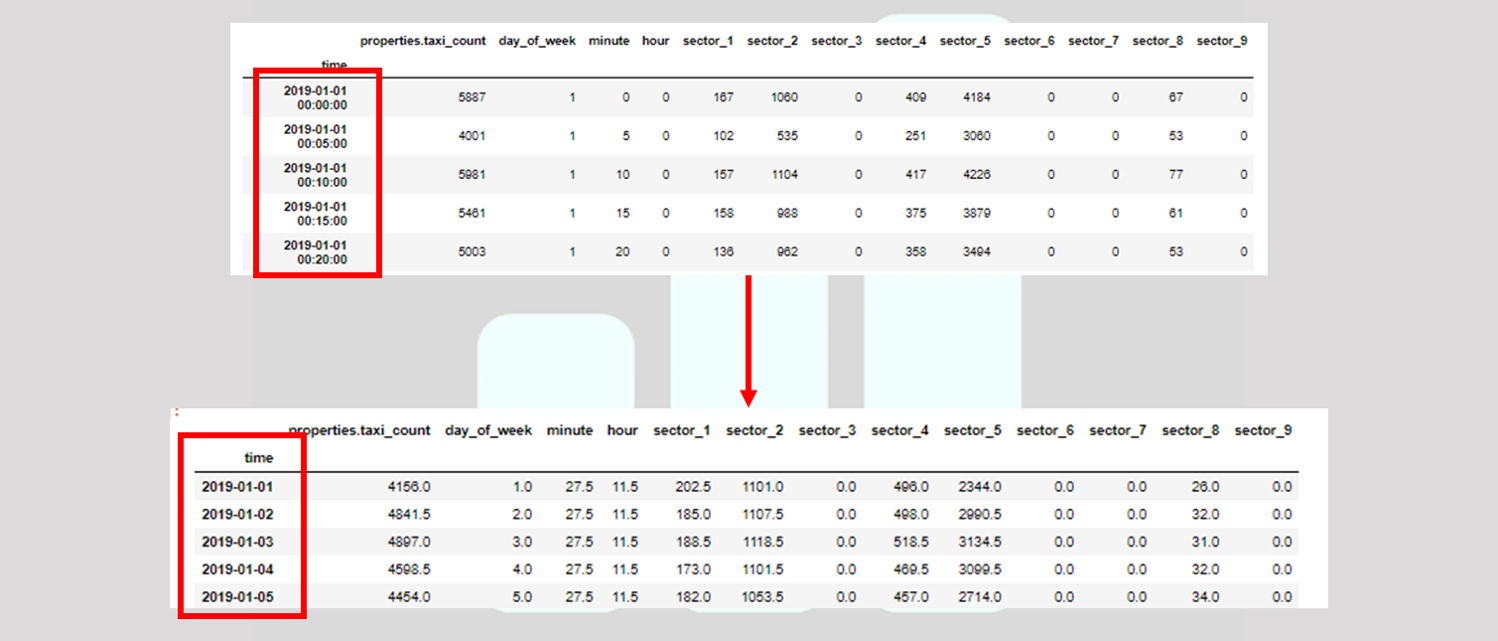

In a median resample, the DataFrame index now considers only the <strong>Day</strong>. Notice how the hours have disappeared, leaving only the date. 

<strong>Hint: Google "median resample by day pandas"</strong>

In [ ]:
# Step 6: Resample your DataFrame by day, and take the day's median value


### Step 7: Plot 'properties.taxi_count' from the resampled DataFrame over original plot
Now that you've resampled the the DataFrame by day, it's time to plot it so that you can see the effects of your analysis. 

In [ ]:
# Step 7: Plot resampled DataFrame over original plot

What do you see? We hope you see something like this:

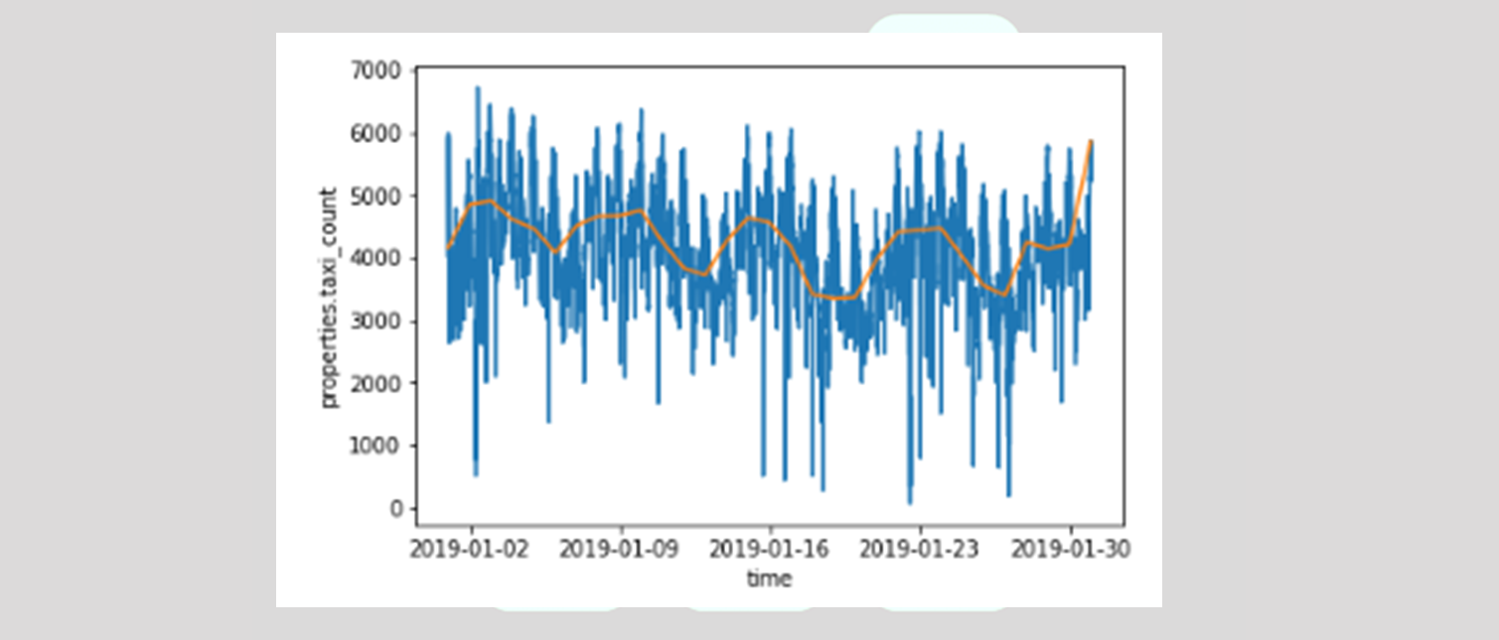

Once you resample, there is less intraday variation since you're taking only the median of the day. More importantly, can you see the rough cyclic nature of the available taxis throughout the month.

### [Optional] Do the same analysis on sectors 1-9
If you are curious, do the same analysis on sectors 1-9 and see how the resamples vary with the taxi availability in different parts of Singapore

In [ ]:
# [Optional] Do the same analysis for sectors 1-9

### Step 10: Get the hourly average of taxi availability
Get the hourly average data of the DataFrame. This means we'll be averaging all of the taxi availability for the hours of the day, across all days. 

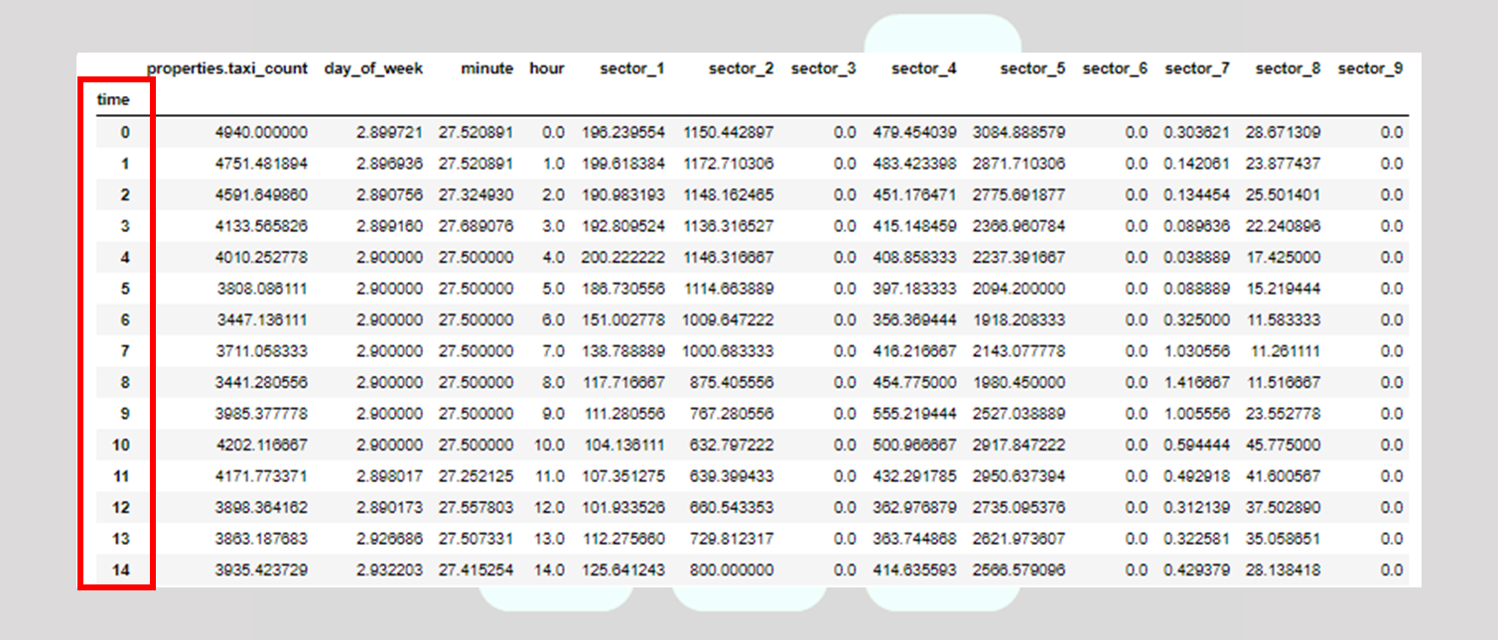

Compared to what you did in Step 9 where it was a resampling, what you're doing here is to group the 'properties.taxi_count' by the hour and followed by the averaging. 

<strong>Hint: Google "hourly average pandas"</strong>

In [ ]:
# Step 10: Get the DataFrame containing the hourly average

### Step 11: Plot the hourly average of 'properties.taxi_count' using barplot
Time to plot the the averages to see if there's a pattern.

In [ ]:
# Step 11: Plot the hourly average of 'properties.taxi_count'

### [Optional] Repeat Step 11 for sectors 1-9
Try to do the same for sectors 1-9 and see if there are any differences in the patterns. 

In [ ]:
# [Optional] Additional plots for sectors 1-9

### Step 12: Get the day of week average DataFrame
At first, we got the hourly average of the data. Next, we will get the day of week average. I.e. the averages of Monday, Tuesday, ..., Sunday.

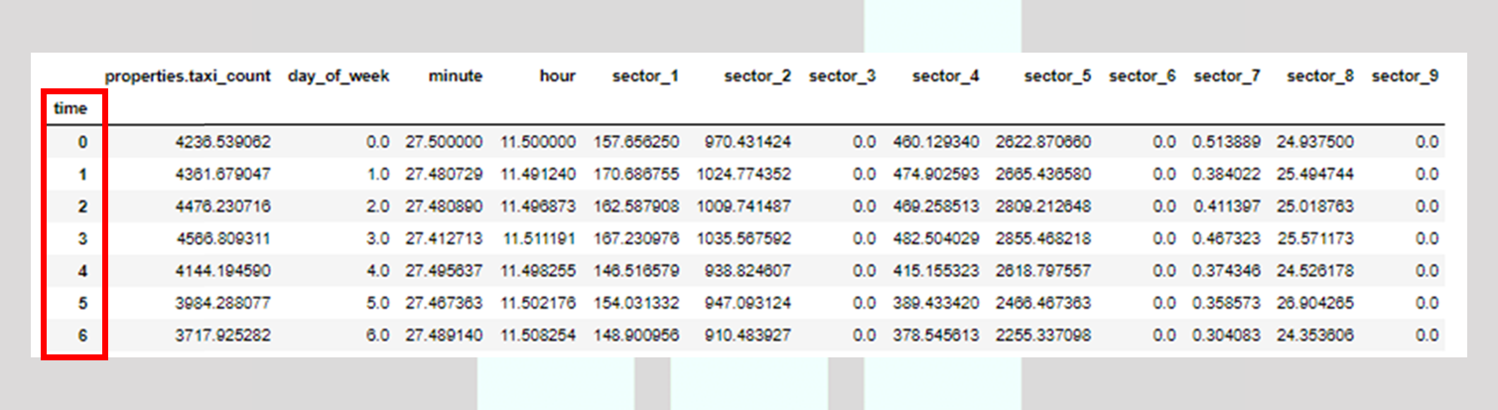

<strong>Hint: It's similar to step 10, except you'll have to change a thing or two</strong>

In [ ]:
# Step 12: Get the day of week average

### Step 13: Plot the day of week average for 'properties.taxi_count", and sectors 1-9
You know the drill - plot the day of week average for 'properties.taxi_count' and the nine sectors.

In [ ]:
# Step 13: Plot day of week average for properties.taxi_count

# [Optional]: Plot day of week average for sectors 1-9

### Step 14: Drop the columns that don't contain data
You might have already noticed that there are some sectors that do not contain any coordinates. These are sectors 3, 6, 7, and 9. 

Let's just drop these columns.

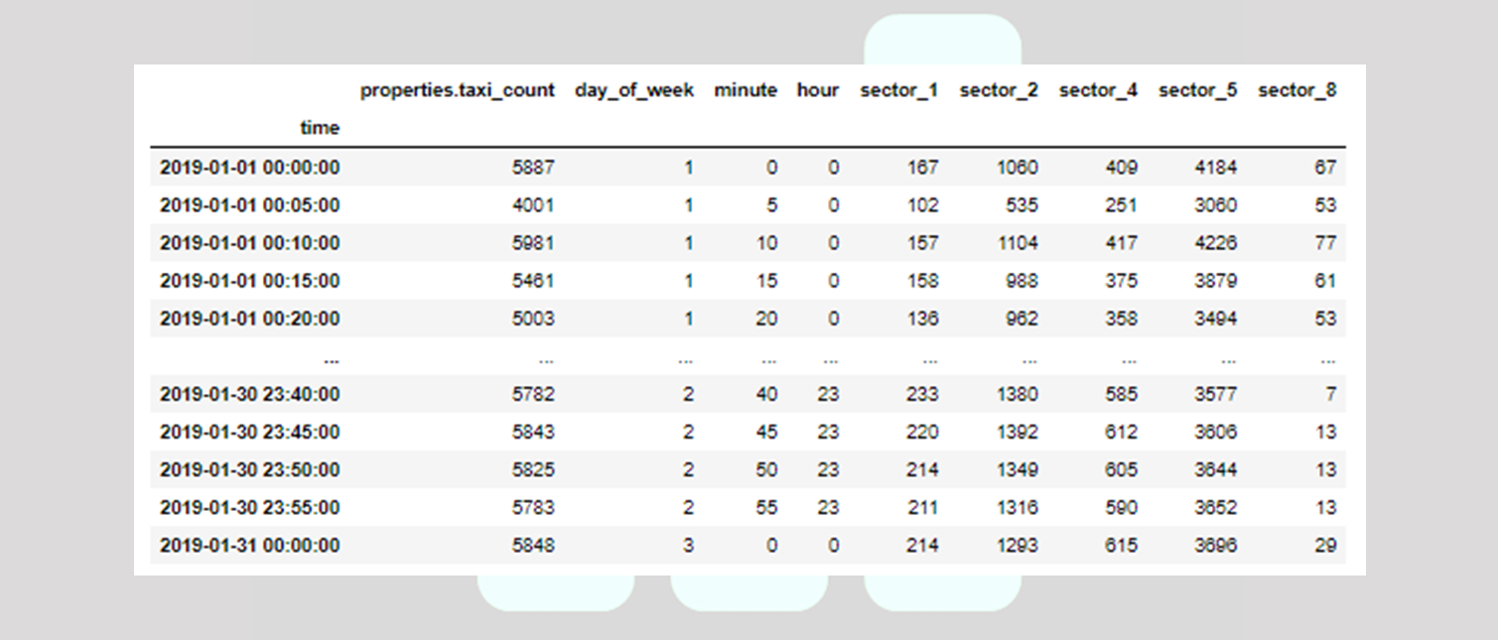

<strong>Hint: Google "remove column pandas"</strong>

In [ ]:
# Step 14: Remove the columns from the DataFrame

# Step 15: Export your DataFrame as CSV
In this Part, we transformed our data and visualized them to identify patterns and outliers. We firstly successfully identify odd rows containing absolutely no available taxis, and we also removed sectors in the dataset that wasn't useful, i.e. 0 at all times.

After we're done dropping the empty columns, we will then export the cleaned DataFrame as a CSV for use in Part IV!

In [ ]:
# Step 15: Export your cleaned DataFrame as CSV